# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
customers_df = pd.read_csv("https://raw.githubusercontent.com/oktaagnes/MLPemula/refs/heads/main/Customers.csv")
customers_df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [ ]:
# Tampilkan informasi umum tentang dataset
print("\nInformasi dataset:")
customers_df.info()


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [ ]:
# Statistik deskriptif dataset
print("\nStatistik deskriptif:")
customers_df.describe()


Statistik deskriptif:


,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
# Melihat beberapa baris dataset
customers_df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [ ]:
# Tipe data di setiap kolom
print("Tipe data setiap kolom:")
customers_df.dtypes

Tipe data setiap kolom:


,0
CustomerID,int64
Gender,object
Age,int64
Annual Income ($),int64
Spending Score (1-100),int64
Profession,object
Work Experience,int64
Family Size,int64


### 2. Menangani data yang hilang

In [ ]:
# Mengecek jumlah nilai yang hilang
print("\nJumlah nilai yang hilang per kolom:")
customers_df.isnull().sum()


Jumlah nilai yang hilang per kolom:


,0
CustomerID,0
Gender,0
Age,0
Annual Income ($),0
Spending Score (1-100),0
Profession,35
Work Experience,0
Family Size,0


In [ ]:
# Mengisi nilai yang hilang
customers_df['Profession'] = customers_df['Profession'].fillna('unknow')
print("Setelah diisi dengan nilai tetap:")
customers_df

Setelah diisi dengan nilai tetap:


,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [ ]:
print("Jumlah nilai yang hilang per kolom:")
print(customers_df.isna().sum())

Jumlah nilai yang hilang per kolom:
CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64


### 3. Analisis Distribusi dan Korelasi

In [ ]:
# Statistik deskriptif untuk variabel numerik
print("\nStatistik deskriptif:")
customers_df.describe()


Statistik deskriptif:


,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


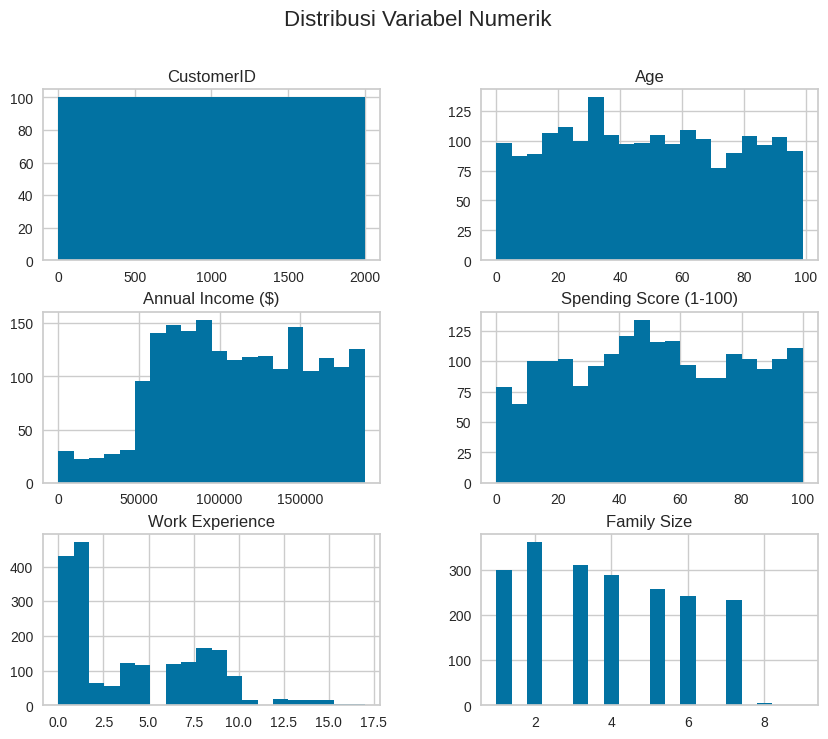

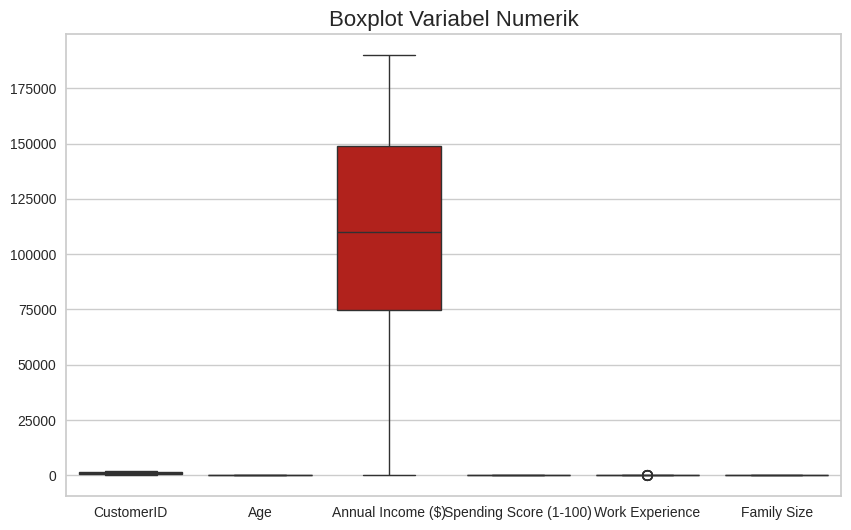

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
customers_df.hist(figsize=(10, 8), bins=20)
plt.suptitle("Distribusi Variabel Numerik", fontsize=16)
plt.show()

# Boxplot untuk deteksi outlier
plt.figure(figsize=(10, 6))
sns.boxplot(data=customers_df.select_dtypes(include='number'))
plt.title("Boxplot Variabel Numerik", fontsize=16)
plt.show()

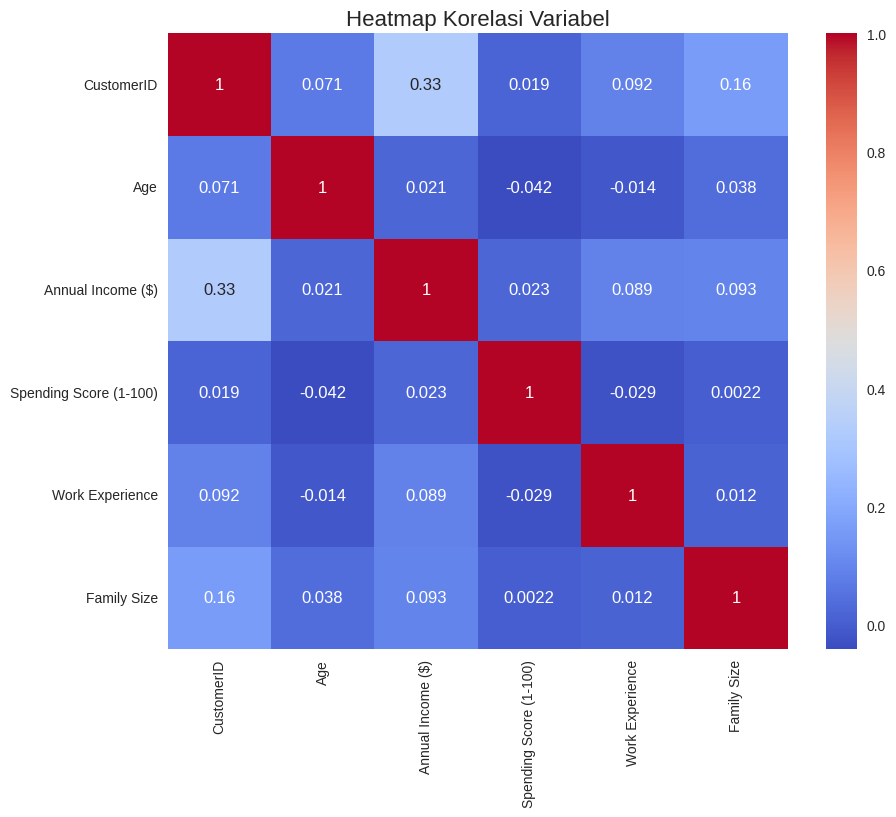

In [ ]:
# Matriks korelasi
correlation_matrix = customers_df.select_dtypes(include=np.number).corr()

# Visualisasi heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Variabel", fontsize=16)
plt.show()

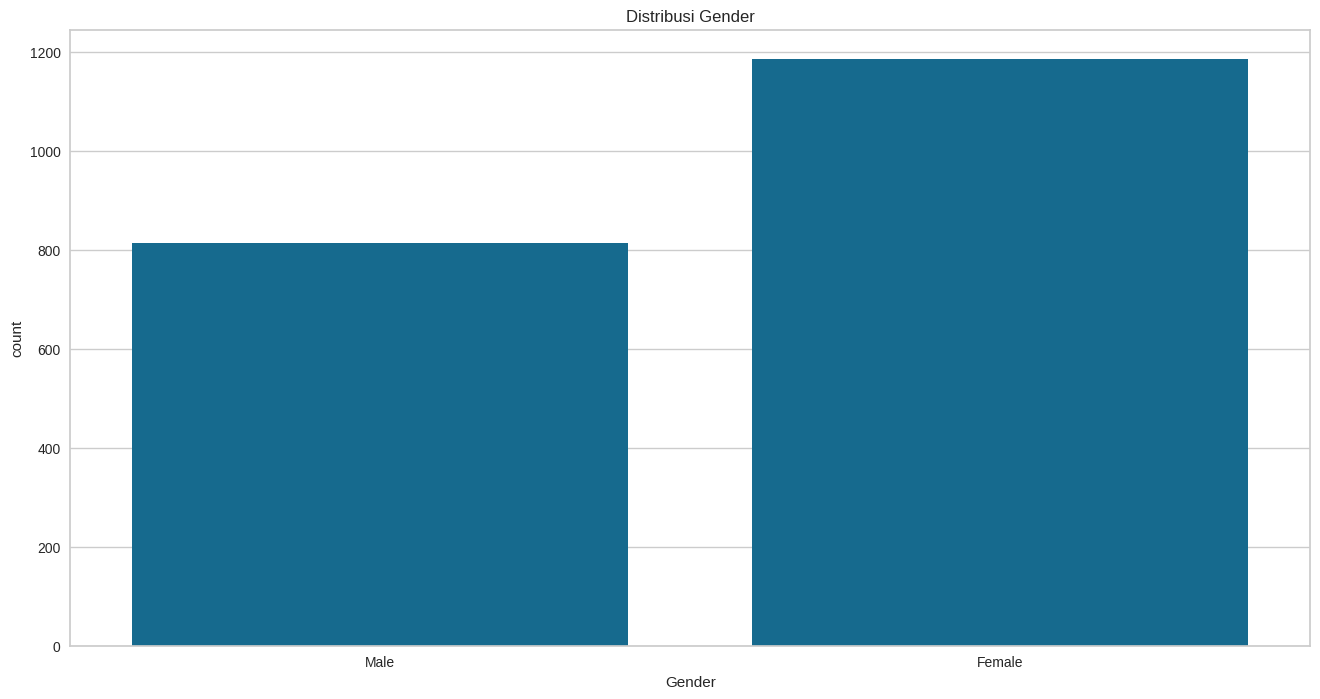

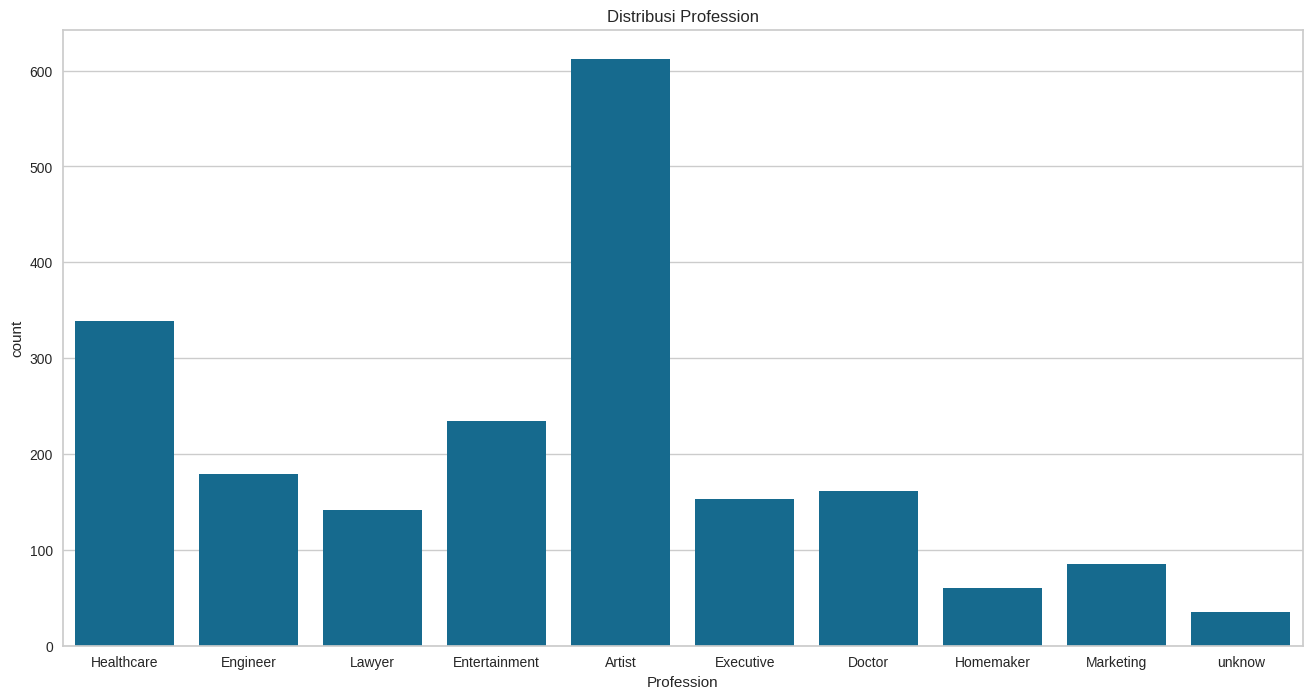

In [ ]:
# Diagram batang
categorical_columns = customers_df.select_dtypes(include='object').columns

for col in categorical_columns:
    plt.figure(figsize=(16, 8))
    sns.countplot(x=col, data=customers_df)
    plt.title(f"Distribusi {col}")
    plt.show()

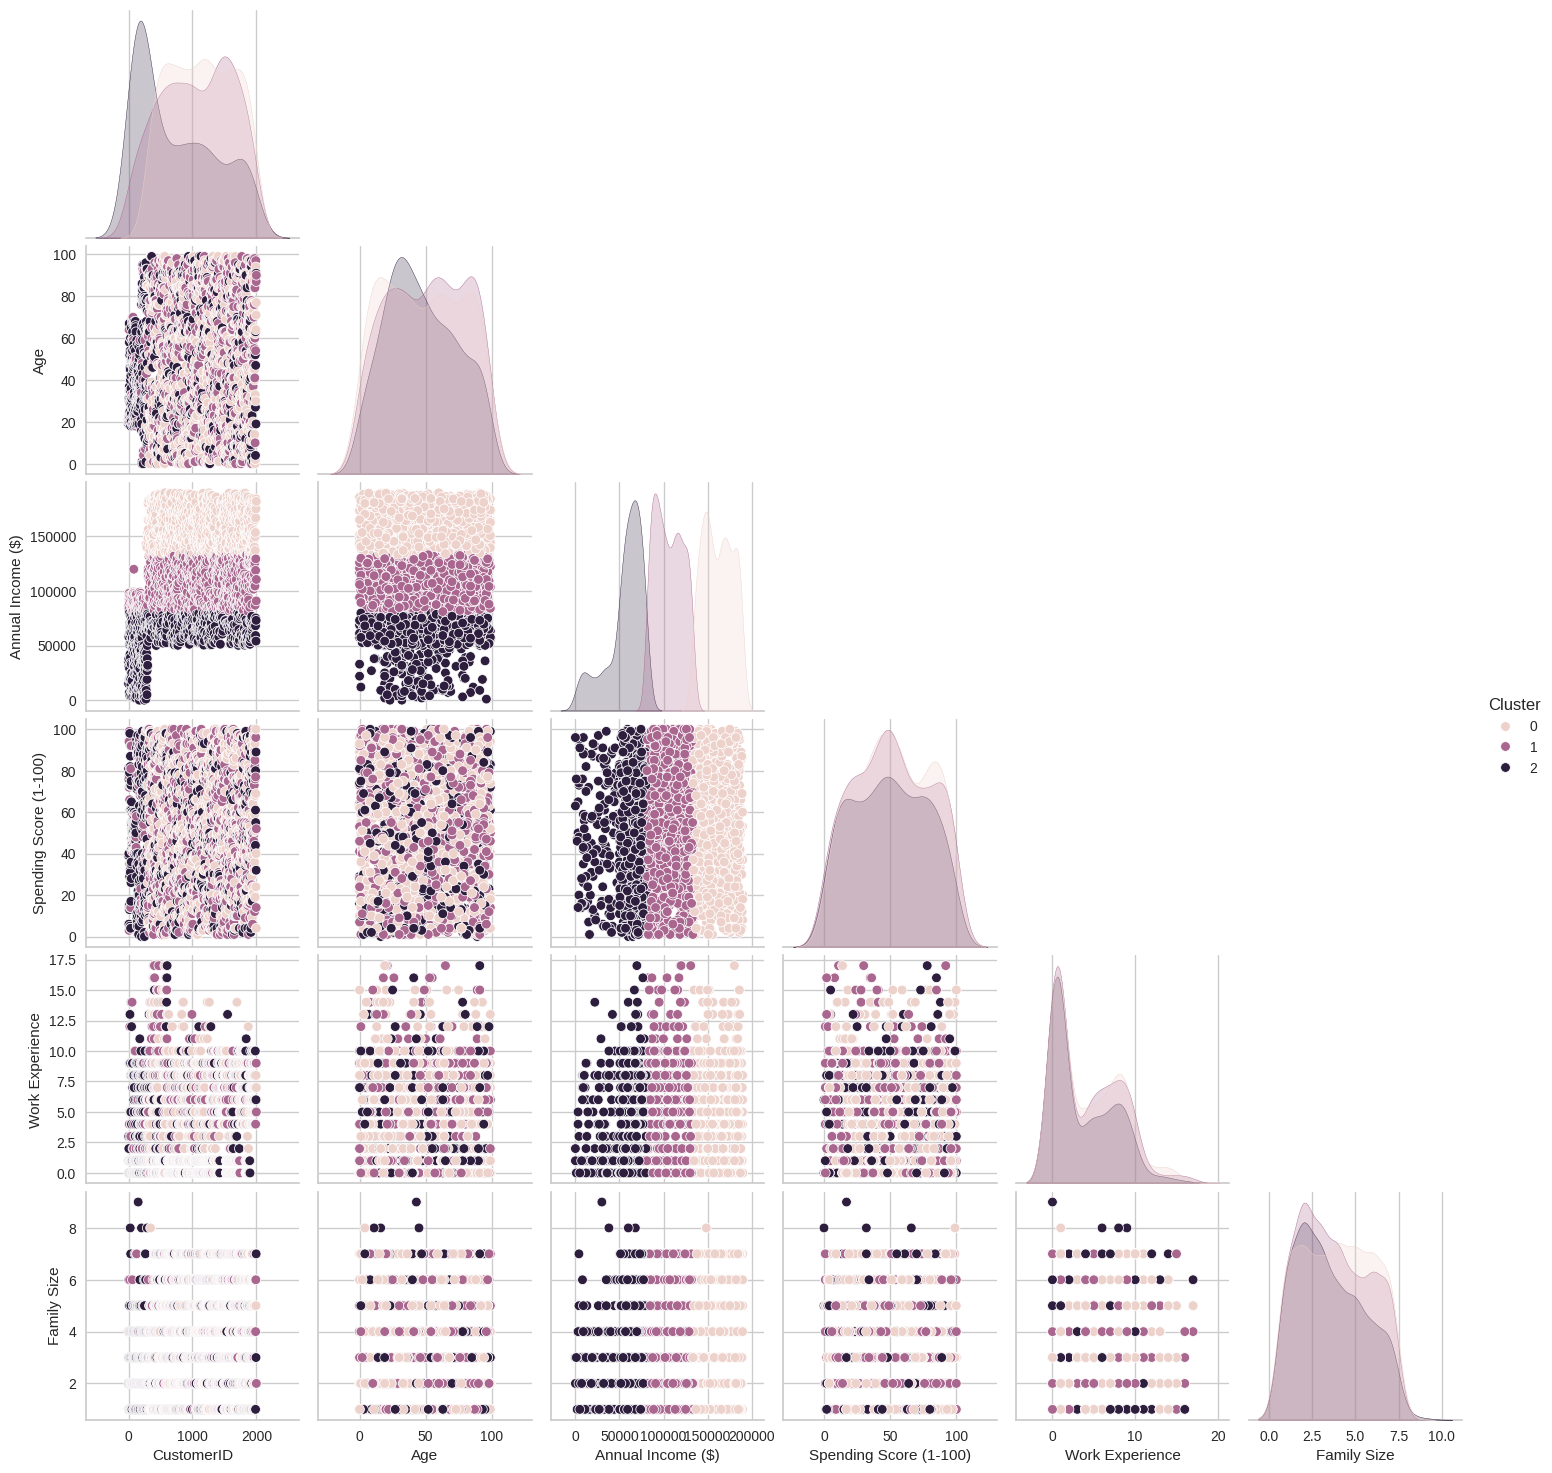

In [ ]:
# Pairplot untuk analisis hubungan variabel
kmeans = KMeans(n_clusters=3, random_state=42)  # Initialize KMeans

# Ensure the column names are correct
# Check for typos, extra spaces, or incorrect casing in column names
# Replace 'Annual Income (k$)' and 'Spending Score (1-100)' with the actual column names if needed
customers_df['Cluster'] = kmeans.fit_predict(customers_df[['Annual Income ($)', 'Spending Score (1-100)']]) # Perform clustering and add 'Cluster' column

sns.pairplot(customers_df, hue='Cluster', diag_kind='kde', corner=True)  # Sesuaikan 'Cluster' dengan kolom kategori
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

### Splitting data

In [ ]:
# Mengambil kolom 'Work Experience' dan 'Annual Income ($)' dari dataset dan menyimpannya dalam array X
# X = df.iloc[:, [3, 4]].values
X = customers_df[['Annual Income ($)','Spending Score (1-100)']].values

# Menampilkan data yang diambil dalam format DataFrame dengan nama kolom yang sesuai
print(pd.DataFrame(X, columns=['Annual Income ($)', 'Spending Score (1-100)']))

      Annual Income ($)  Spending Score (1-100)
0                 15000                      39
1                 35000                      81
2                 86000                       6
3                 59000                      77
4                 38000                      40
...                 ...                     ...
1995             184387                      40
1996              73158                      32
1997              90961                      14
1998             182109                       4
1999             110610                      52

[2000 rows x 2 columns]


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

### Elbow Method

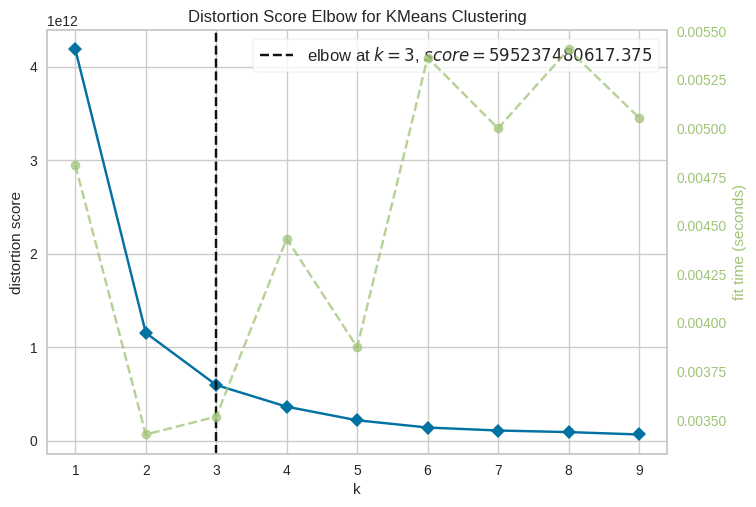

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [ ]:
from sklearn.cluster import KMeans

# Inisialisasi dan melatih model KMeans dengan jumlah cluster = 2
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

# Mendapatkan label cluster
labels = kmeans.labels_

# Mendapatkan jumlah cluster
k = 2

# Fungsi untuk analisis karakteristik cluster
def analyze_clusters(X, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        # Mengambil data untuk cluster saat ini
        cluster_data = X[labels == cluster_id]

        # Menghitung rata-rata untuk setiap fitur dalam cluster
        mean_income = cluster_data[:, 0].mean()  # Rata-rata Annual Income
        mean_spending = cluster_data[:, 1].mean()  # Rata-rata Spending Score

        print(f"\nCluster {cluster_id + 1}:")
        print(f"Rata-rata pendapatan: {mean_income:.2f}")
        print(f"Rata-rata Total spending: {mean_spending:.2f}")

# Analisis karakteristik setiap cluster
analyze_clusters(X, labels, k)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata pendapatan: 106033.98
Rata-rata Total spending: 51.14

Cluster 2:
Rata-rata pendapatan: 161639.66
Rata-rata Total spending: 52.16


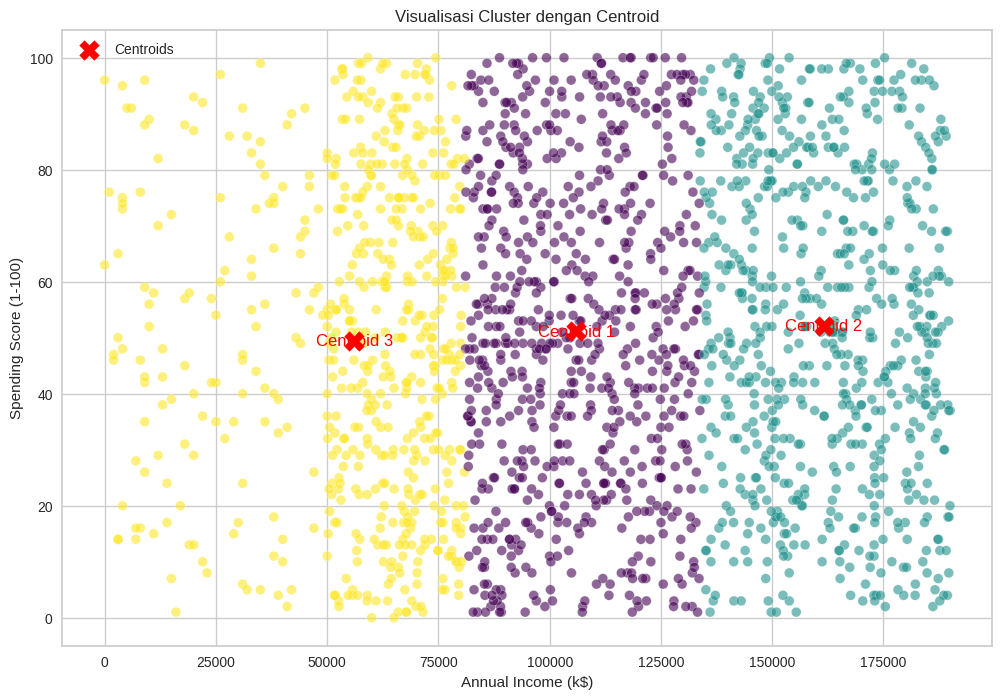

Nilai Centroids:
Centroid 1: Annual Income = 105924.60, Spending Score = 51.12
Centroid 2: Annual Income = 161599.80, Spending Score = 52.14
Centroid 3: Annual Income = 56080.47, Spending Score = 49.37


In [ ]:
import matplotlib.pyplot as plt

# Menentukan posisi centroid
centroids = kmeans.cluster_centers_

# Visualisasi cluster
plt.figure(figsize=(12, 8))

# Plot data
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')

# Plot centroid
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

# Menambahkan label centroid pada plot
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')

# Menambahkan judul dan label
plt.title('Visualisasi Cluster dengan Centroid')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

plt.show()

# Menampilkan nilai centroid
print("Nilai Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: Annual Income = {centroid[0]:.2f}, Spending Score = {centroid[1]:.2f}")

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5576413814508253


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
# Menambahkan label ke dataframe
customers_df['Cluster'] = labels

In [ ]:
len(labels)

2000

In [ ]:
customers_df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Cluster
0,1,Male,19,15000,39,Healthcare,1,4,2
1,2,Male,21,35000,81,Engineer,3,3,2
2,3,Female,20,86000,6,Engineer,1,1,0
3,4,Female,23,59000,77,Lawyer,0,2,2
4,5,Female,31,38000,40,Entertainment,2,6,2
...,...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7,1
1996,1997,Female,91,73158,32,Doctor,7,7,2
1997,1998,Male,87,90961,14,Healthcare,9,2,0
1998,1999,Male,77,182109,4,Executive,7,2,1


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

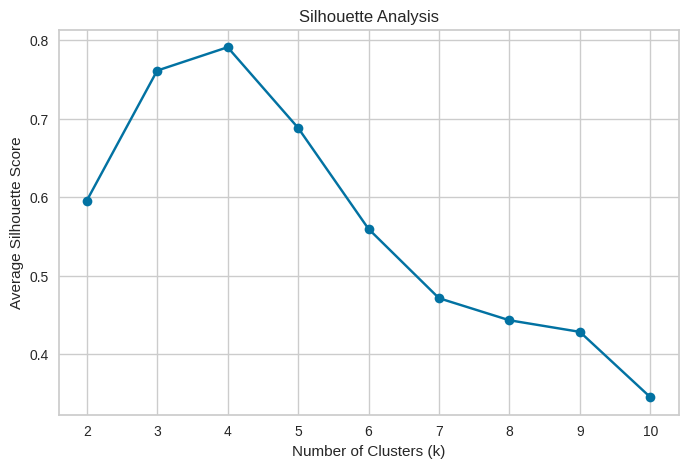

Optimal number of clusters: 4


In [ ]:
from sklearn.datasets import make_blobs

# Generate example data
X, _ = make_blobs(n_samples=500, centers=4, random_state=42)

# Evaluate silhouette scores for different values of k
k_range = range(2, 11)
silhouette_avg_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    silhouette_avg_scores.append(silhouette_avg)

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_avg_scores, marker='o')
plt.title("Silhouette Analysis")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Average Silhouette Score")
plt.show()

# Optimal k is where silhouette score is highest
optimal_k = k_range[np.argmax(silhouette_avg_scores)]
print(f"Optimal number of clusters: {optimal_k}")

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
silhouette_avg = silhouette_score(X, labels)
print(f"Rata-rata Silhouette Score: {silhouette_avg:.2f}")

Rata-rata Silhouette Score: 0.35


Tulis hasil interpretasinya di sini.
Nilai Centroids:
1. Cluster 1:
*   Rata-rata Annual Income (k$): 105924.60
*   Rata-rata Spending Score (1-100):51.12
*   Analisis: Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

2. Cluster 2:
*   Rata-rata Annual Income (k$) :161599.80
*   Rata-rata Spending Score (1-100):52.14
*   Analisis: Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

3. Cluster 3:
*   Rata-rata Annual Income (k$) :56080.47
*   Rata-rata Spending Score (1-100):49.37
*   Analisis: Cluster ini mencakup pelanggan dengan pendapatan tahunan rendah dan tingkat pengeluaran yang rendah. Pelanggan dalam cluster memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [118]:
customers_df.to_csv('customer1.csv', index=False)

In [120]:
from google.colab import files

# Mengunduh file CSV yang sudah disimpan
files.download('customer1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>